# **---- PREDICTION OF EMOTION OF SPOTIFY SONGS ----**
   ##### { WHETHER THE SONG IS SAD SONG OR HAPPY / ENERGETIC SONG }

Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}# we wll select only 2 i.e sad & happy

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

Loudness: the overall loudness of a track in decibels (dB).Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Speechiness: Speechiness detects the presence of spoken words in a track. (e.g. talk show, audiobook, poetry).Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("D:\Datasets for Practice\spotify_label.csv")
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.450000e-07,2
1,194641,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.460000e-07,1
2,217573,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.010000e-07,1
3,443478,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.960000e-08,0
4,225862,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.690000e-07,1


In [3]:
df.shape

(277938, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  int64  
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 25.4 MB


In [5]:
df.isna().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

In [6]:
df.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754688e-07,1.179101
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.191077e-07,1.021033
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.530000e-07,0.000000
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.350000e-07,1.000000
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.450000e-07,2.000000
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.970000e-05,3.000000


<Axes: >

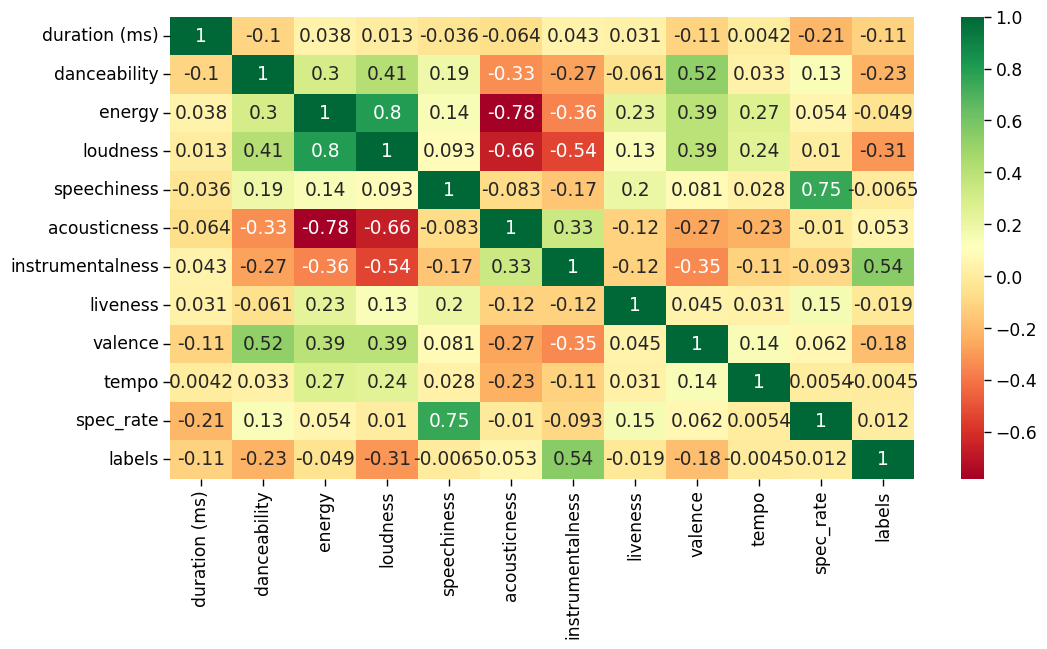

In [7]:
plt.figure(figsize=(12,6))
sns.set_context('paper',font_scale=1.4)
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [8]:
df.corr()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
duration (ms),1.000000,-0.104900,0.037770,0.012820,-0.036197,-0.064319,0.042721,0.031416,-0.106144,0.004152,-0.210130,-0.114558
danceability,-0.104900,1.000000,0.303897,0.414604,0.191194,-0.330091,-0.274751,-0.060570,0.521399,0.032550,0.134470,-0.229390
energy,0.037770,0.303897,1.000000,0.802642,0.144617,-0.779596,-0.361357,0.234200,0.391237,0.267519,0.053827,-0.048570
loudness,0.012820,0.414604,0.802642,1.000000,0.092848,-0.663215,-0.541662,0.133346,0.392798,0.244641,0.010416,-0.309437
speechiness,-0.036197,0.191194,0.144617,0.092848,1.000000,-0.083095,-0.167207,0.200167,0.080731,0.027930,0.751062,-0.006543
acousticness,-0.064319,-0.330091,-0.779596,-0.663215,-0.083095,1.000000,0.332768,-0.117062,-0.267692,-0.234832,-0.010131,0.053265
instrumentalness,0.042721,-0.274751,-0.361357,-0.541662,-0.167207,0.332768,1.000000,-0.116973,-0.345532,-0.112559,-0.092946,0.541494
liveness,0.031416,-0.060570,0.234200,0.133346,0.200167,-0.117062,-0.116973,1.000000,0.045150,0.031481,0.154280,-0.019369
valence,-0.106144,0.521399,0.391237,0.392798,0.080731,-0.267692,-0.345532,0.045150,1.000000,0.141085,0.062021,-0.182134
tempo,0.004152,0.032550,0.267519,0.244641,0.027930,-0.234832,-0.112559,0.031481,0.141085,1.000000,0.005412,-0.004499


In [9]:
df=df.drop(columns='duration (ms)')
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.450000e-07,2
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.460000e-07,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.010000e-07,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.960000e-08,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.690000e-07,1


In [10]:
df['labels'].unique()

array([2, 1, 0, 3], dtype=int64)

In [11]:
df1=df[(df['labels']!=2) & (df['labels']!=3)]

In [12]:
df1['labels'].unique()

array([1, 0], dtype=int64)

In [13]:
df1.shape

(188487, 11)

In [14]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [15]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
X_train.shape

(131940, 10)

In [17]:
X_test.shape

(56547, 10)

In [18]:
scaler=StandardScaler()

In [19]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[-1.65217346e-01, -1.55142861e-01,  2.49572032e-02, ...,
        -5.20599438e-01,  1.00313580e-01, -3.73445411e-01],
       [-1.23530783e-01, -7.86459866e-01, -4.97919847e-04, ...,
        -3.23143931e-01, -9.29935781e-01, -3.26725380e-01],
       [-4.86799400e-01,  1.17980099e-01,  7.16832033e-01, ...,
        -6.01904647e-01,  5.11749324e-01,  7.50755334e-01],
       ...,
       [ 7.10200468e-01, -6.55943496e-02, -7.32275375e-01, ...,
        -2.88298842e-01,  5.49518546e-02, -3.78312081e-01],
       [ 3.40976628e-01,  1.13435570e+00,  5.84740584e-01, ...,
         6.75748633e-01, -2.47413053e-01, -3.64685405e-01],
       [-1.65997837e+00, -1.99536477e+00, -6.80677153e-01, ...,
        -1.76805364e+00,  4.61599804e-01, -3.53005398e-01]])

In [21]:
X_test_scaled

array([[-2.56873052, -0.52569939, -0.055874  , ..., -1.80405519,
         0.05465372, -0.4403292 ],
       [-0.34860049, -0.95553239, -0.87195292, ...,  0.00961253,
        -1.29582155, -0.22115299],
       [-0.24686946, -0.47197026, -1.09433155, ...,  1.09951977,
         0.54673143, -0.13692978],
       ...,
       [ 1.15941236, -0.09586638,  0.23556632, ...,  0.18415283,
         1.72533184,  0.33315325],
       [-1.04874931, -1.91817924, -0.77918006, ..., -0.64976196,
         0.46541616, -0.3621779 ],
       [-0.10923337,  1.50705255,  1.03806311, ...,  1.38266294,
        -0.46407558, -0.34357044]])

In [22]:
classifier=LogisticRegression(random_state=0).fit(X_train_scaled,y_train)

In [23]:
classifier.predict(X_train_scaled)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [24]:
predictions=classifier.predict(X_test_scaled)
predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
#Classification Report
report = classification_report (y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     24575
           1       0.89      0.91      0.90     31972

    accuracy                           0.88     56547
   macro avg       0.88      0.88      0.88     56547
weighted avg       0.88      0.88      0.88     56547



In [26]:
print (confusion_matrix (y_test, predictions))

[[20921  3654]
 [ 2946 29026]]


In [27]:
print("Accuracy score:",accuracy_score(y_test, predictions))

Accuracy score: 0.8832829327815799


In [28]:
classifier.score(X_train_scaled,y_train)

0.8843641048961649

In [29]:
classifier.score(X_test_scaled,y_test)

0.8832829327815799

In [30]:
# IMPROVING MODEL

In [31]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1', 'l2', 'elasticnet'],'C':[1,2,3,4,5,6,10,20,40,50],'max_iter':[100,200,300]}

In [32]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
classifier_regressor.fit(X_train_scaled,y_train)

In [ ]:
# Best parameters by grid search cv
print(classifier_regressor.best_params_)

In [ ]:
print(classifier_regressor.best_score_)

In [ ]:
#predictions again
y_pred=classifier_regressor.predict(X_test_scaled)

In [ ]:
# accuracy score
print("Accuracy score:",accuracy_score(y_pred, y_test))

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
#classifier1=LogisticRegression(random_state=0,C=1,fit_intercept=True,solver='saga').fit(X_train_scaled,y_train)

In [ ]:
#classifier1.score(X_train_scaled,y_train)

In [ ]:
#classifier1.score(X_test_scaled,y_test)

In [ ]:
#EDA
#sns.pairplot(df1,hue='labels')